In [3]:
import pandas as pd
import numpy as np

In [4]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Data discription
fetch data from .csv file

In [7]:
dataset = pd.read_csv("/Users/linchihhai/Downloads/Data-Collisions.csv")
print("The data set dimension is " + str(dataset.shape))

The data set dimension is (194673, 38)


In [8]:
dataset.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [9]:
dataset.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

# Preliminary Analysis

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# divide dataset by target label
df1 = dataset[dataset['SEVERITYCODE']==1]
df2 = dataset[dataset['SEVERITYCODE']==2]

Text(0, 0.5, 'Incident Proportion')

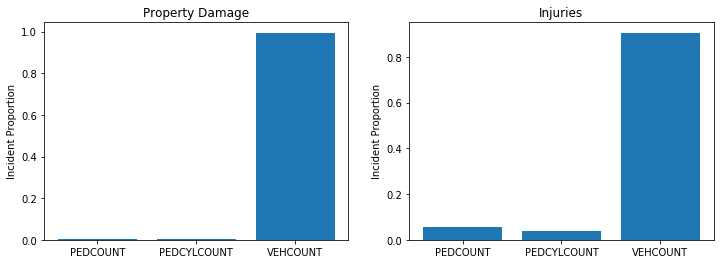

In [11]:
# damage distribution
features = ['SEVERITYCODE','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']
df_prop = df1[features].groupby(by=["SEVERITYCODE"]).sum()
df_inj = df2[features].groupby(by=["SEVERITYCODE"]).sum()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
x=df_prop.columns
y1=np.divide(df_prop.to_numpy()[0], sum(df_prop.to_numpy()[0]))
y2=np.divide(df_inj.to_numpy()[0], sum(df_inj.to_numpy()[0]))
ax1.bar(x, y1)
ax2.bar(x, y2)
ax1.title.set_text('Property Damage')
ax2.title.set_text('Injuries')
ax1.set_ylabel('Incident Proportion')
ax2.set_ylabel('Incident Proportion')

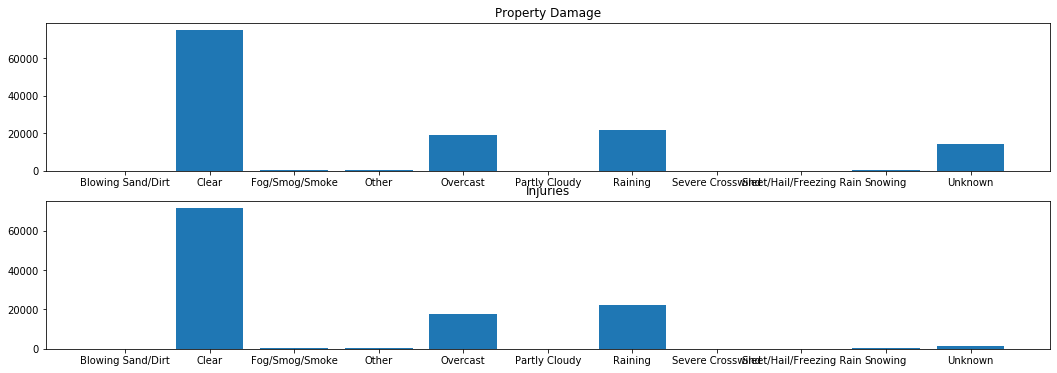

In [12]:
# weather distribution
y1=df1.groupby(by=['WEATHER']).sum()['SEVERITYCODE']
y2=df2.groupby(by=['WEATHER']).sum()['SEVERITYCODE']
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,6))
ax1.bar(y1.index, y1)
ax1.title.set_text('Property Damage')
ax2.bar(y2.index, y2)
ax2.title.set_text('Injuries')

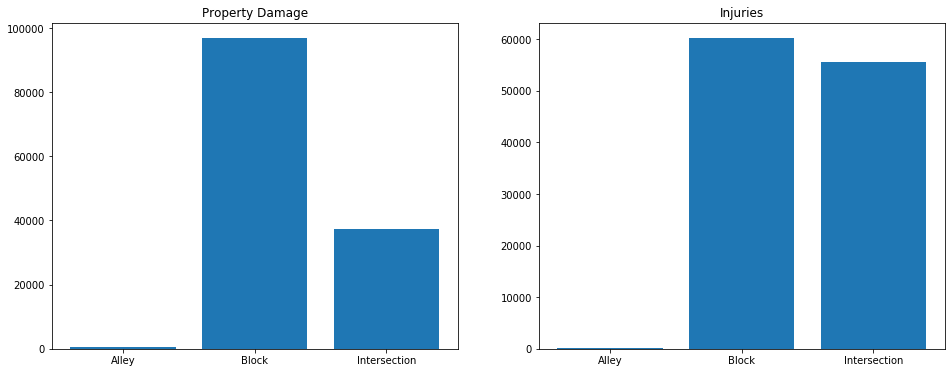

In [13]:
# address distribution
y1=df1.groupby(by=['ADDRTYPE']).sum()['SEVERITYCODE']
y2=df2.groupby(by=['ADDRTYPE']).sum()['SEVERITYCODE']
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.bar(y1.index, y1)
ax1.title.set_text('Property Damage')
ax2.bar(y2.index, y2)
ax2.title.set_text('Injuries')

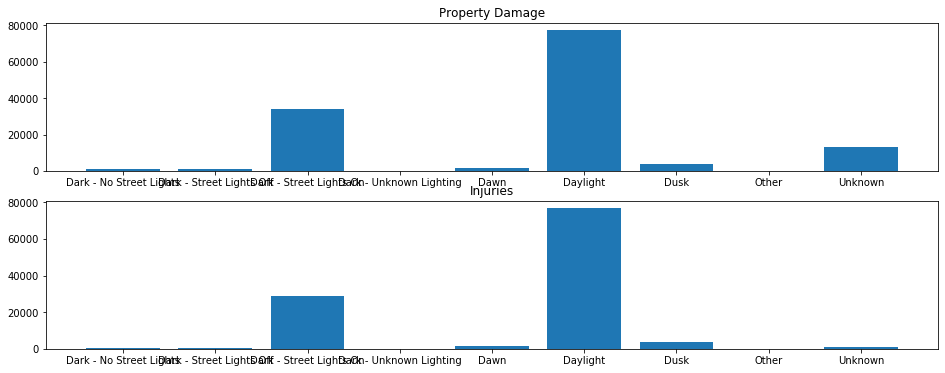

In [14]:
# light distribution
y1=df1.groupby(by=['LIGHTCOND']).sum()['SEVERITYCODE']
y2=df2.groupby(by=['LIGHTCOND']).sum()['SEVERITYCODE']
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(16,6))
ax1.bar(y1.index, y1)
ax1.title.set_text('Property Damage')
ax2.bar(y2.index, y2)
ax2.title.set_text('Injuries')

# Data Cleaning

In [15]:
dataset.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [16]:
# drop na rows
dataset.drop(dataset[dataset["X"].isnull() | \
                     dataset["COLLISIONTYPE"].isnull() | \
                     dataset["JUNCTIONTYPE"].isnull() | \
                     dataset["UNDERINFL"].isnull() | \
                     dataset["WEATHER"].isnull() | \
                     dataset["ROADCOND"].isnull()| \
                     dataset["LIGHTCOND"].isnull()].index,
             inplace=True)

In [17]:
# drop columns that have too many missing data, which makes it not useful
dataset.drop(["INTKEY", 
              "EXCEPTRSNCODE", 
              "EXCEPTRSNDESC", 
              "INATTENTIONIND", 
              "PEDROWNOTGRNT", 
              "SDOTCOLNUM", 
              "SPEEDING"], 
             axis=1, inplace=True)

In [18]:
dataset.isna().sum()

SEVERITYCODE      0
X                 0
Y                 0
OBJECTID          0
INCKEY            0
COLDETKEY         0
REPORTNO          0
STATUS            0
ADDRTYPE          0
LOCATION          0
SEVERITYCODE.1    0
SEVERITYDESC      0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
INCDTTM           0
JUNCTIONTYPE      0
SDOT_COLCODE      0
SDOT_COLDESC      0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
ST_COLCODE        0
ST_COLDESC        0
SEGLANEKEY        0
CROSSWALKKEY      0
HITPARKEDCAR      0
dtype: int64

In [19]:
# drop foreign key colums
dataset.drop(["OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO"],
            axis=1,
            inplace=True)

In [20]:
# categorical columns
for col in dataset.columns.values.tolist():
    if dataset[col].dtype == object:
        print(col)
        print(dataset[col].value_counts())

STATUS
Matched      180066
Unmatched         1
Name: STATUS, dtype: int64
ADDRTYPE
Block           117085
Intersection     62982
Name: ADDRTYPE, dtype: int64
LOCATION
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N    259
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST              246
6TH AVE AND JAMES ST                                        241
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST              232
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST       227
                                                           ... 
2ND AVE NW BETWEEN NW 107TH ST AND NW 110TH ST                1
N 103RD ST BETWEEN ASHWORTH AVE N AND DENSMORE AVE N          1
3RD AVE NE BETWEEN NE 136TH ST AND NE 137TH ST                1
1ST AVE W AND W CROCKETT ST                                   1
SW WINTHROP ST BETWEEN DEAD END 2 AND 57TH AVE SW             1
Name: LOCATION, Length: 23460, dtype: int64
SEVERITYDESC
Property Damage Only Collision    124258
Injury Collision               

In [21]:
dataset.drop(["STATUS", 
              "LOCATION",
              "INCDATE", 
              "SDOT_COLDESC", 
              "ST_COLDESC", 
              "SEGLANEKEY", "CROSSWALKKEY"
             ], 
             axis=1, 
             inplace=True)

In [22]:
dataset.head(10)

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2,Injury Collision,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,N
1,1,-122.347294,47.647172,Block,1,Property Damage Only Collision,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
2,1,-122.334540,47.607871,Block,1,Property Damage Only Collision,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
3,1,-122.334803,47.604803,Block,1,Property Damage Only Collision,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,N
4,2,-122.306426,47.545739,Intersection,2,Injury Collision,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N
5,1,-122.387598,47.690575,Intersection,1,Property Damage Only Collision,Angles,2,0,0,2,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,N,Clear,Dry,Daylight,10,N
6,1,-122.338485,47.618534,Intersection,1,Property Damage Only Collision,Angles,2,0,0,2,12/9/2008,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N
7,2,-122.320780,47.614076,Intersection,2,Injury Collision,Cycles,3,0,1,1,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,N,Clear,Dry,Daylight,5,N
8,1,-122.335930,47.611904,Block,1,Property Damage Only Collision,Parked Car,2,0,0,2,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,0,Clear,Dry,Daylight,32,N
9,2,-122.384700,47.528475,Intersection,2,Injury Collision,Angles,2,0,0,2,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,0,Clear,Dry,Daylight,10,N


In [23]:
dataset.drop(["SEVERITYCODE.1", "SEVERITYDESC"], 
             axis=1, 
             inplace=True)

In [24]:
dataset.head(5)

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,N
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,N
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N


In [25]:
def parse_time_to_hours(timestamp):
    '''timestamp format: m/dd/yyyy h:mm:ss PM/AM'''
    t=timestamp.split(' ')
    try:
        hr=t[1].split(':')
        hr=float(hr[0]) + float(hr[1])/60 + float(hr[2])/3600
        return hr+12 if t[2]=='PM' else hr
    except:
        return np.nan

In [26]:
dataset['INCIDENTHOUR']=dataset['INCDTTM'].apply(lambda x: parse_time_to_hours(x))
dataset['INCIDENTHOUR'].isna().sum()

24664

In [27]:
dataset.drop(dataset[dataset['INCIDENTHOUR'].isnull()].index, inplace=True)
dataset.drop(['INCDTTM'], axis=1, inplace=True)
dataset.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,INCIDENTHOUR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,N,14.900000
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,N,18.916667
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,N,10.333333
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,N,9.433333
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,N,8.066667


In [28]:
dataset['UNDERINFL'] = dataset['UNDERINFL'].apply(lambda x: 0 if x=='0'or x=='no' else 1)

In [29]:
dataset['HITPARKEDCAR'] = dataset['HITPARKEDCAR'].apply(lambda x: 0 if x=='N' else 1)

In [30]:
dataset.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,INCIDENTHOUR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,1,Overcast,Wet,Daylight,10,0,14.900000
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,0,18.916667
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,0,10.333333
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,1,Clear,Dry,Daylight,23,0,9.433333
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,0,8.066667


In [31]:
column_names = ["ADDRTYPE", "COLLISIONTYPE", "JUNCTIONTYPE", "SDOT_COLCODE", "WEATHER", "ROADCOND", "LIGHTCOND", "ST_COLCODE"]
categorical_columns = dataset[column_names]
dummy_columns = pd.get_dummies(categorical_columns, drop_first=True)
df=dataset.copy()
df.drop(column_names, axis=1, inplace=True)
df = pd.concat([df, dummy_columns], axis=1)

In [32]:
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,INCIDENTHOUR,...,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_8,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,ST_COLCODE_85,ST_COLCODE_87,ST_COLCODE_88
0,2,-122.323148,47.703140,2,0,0,2,1,0,14.900000,...,0,0,0,0,0,0,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,0,18.916667,...,0,0,0,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,0,10.333333,...,0,0,0,0,0,0,0,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,1,0,9.433333,...,0,0,0,0,0,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,0,8.066667,...,0,0,0,0,0,0,0,0,0,0


# Model
## Preparation
## Train
## Evaluation

In [33]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y = df.iloc[:,0]
X = preprocessing.StandardScaler().fit(X).transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (124322, 163) (124322,)
Test set: (31081, 163) (31081,)


In [35]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix #,classification_report
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime

In [36]:
# since knn is not good at high-dimensional data, ST_COLCODE and SDOT_COLCODE has to be taken out
knn_cols = [col for col in df.columns if ('ST_COLCODE' not in col) and ('SDOT_COLCODE' not in col)]
#knn_cols

In [37]:
X_knn = df[knn_cols].iloc[:,1:]
X_knn = preprocessing.StandardScaler().fit(X_knn).transform(X_knn)
y_knn = df.iloc[:,0]

In [38]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=7)
print ('Train set:', X_knn_train.shape,  y_knn_train.shape)
print ('Test set:', X_knn_test.shape,  y_knn_test.shape)

Train set: (124322, 51) (124322,)
Test set: (31081, 51) (31081,)


In [39]:
X_knn_train_KNN, X_knn_test_KNN, y_knn_train_KNN, y_knn_test_KNN = train_test_split(X_knn_train, y_knn_train, 
                                                                                    test_size=0.2, random_state=7)

In [40]:
X_knn_train_KNN.shape

(99457, 51)

1  finished running at  2020-10-07 22:59:33.488299
2  finished running at  2020-10-07 23:02:57.799857
3  finished running at  2020-10-07 23:06:27.490168
4  finished running at  2020-10-07 23:09:56.523642
5  finished running at  2020-10-07 23:13:22.582113
6  finished running at  2020-10-07 23:16:50.069181
7  finished running at  2020-10-07 23:20:21.066957
8  finished running at  2020-10-07 23:23:51.085631
9  finished running at  2020-10-07 23:27:16.913715
10  finished running at  2020-10-07 23:30:43.021219
11  finished running at  2020-10-07 23:34:07.053536
12  finished running at  2020-10-07 23:37:28.509877
13  finished running at  2020-10-07 23:40:46.069603
14  finished running at  2020-10-07 23:44:03.802032
15  finished running at  2020-10-07 23:47:21.672344
16  finished running at  2020-10-07 23:50:39.109497
17  finished running at  2020-10-08 04:52:25.086352
18  finished running at  2020-10-08 04:56:29.232586
19  finished running at  2020-10-08 05:00:40.485844
20  finished running 

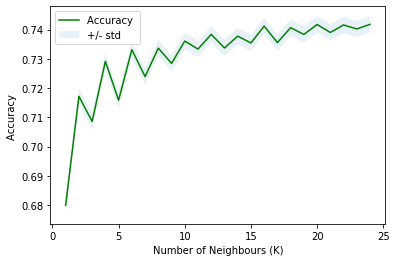

In [41]:
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_knn_train_KNN,y_knn_train_KNN)
    yhat=neigh.predict(X_knn_test_KNN)
    mean_acc[n-1] = accuracy_score(y_knn_test_KNN, yhat)
    std_acc[n-1]=np.std(yhat==y_knn_test_KNN)/np.sqrt(yhat.shape[0])
    
    print(n, ' finished running at ', datetime.now())
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.show()

In [42]:
neigh = KNeighborsClassifier(n_neighbors = 10).fit(X_knn_train, y_knn_train)

In [43]:
yhat=neigh.predict(X_knn_test)
f1score_KNN=round(f1_score(y_knn_test, yhat, average='weighted'),2)
print("KNN's evaluation F1-score: ", "{:10.2f}".format(f1score_KNN) )

KNN's evaluation F1-score:        0.71
